In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/MLData/tested.csv')

In [4]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### ***INITIAL EXPLORATION***

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
1 - (df_test.count() / len(df_test))

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [7]:
df_test.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### ***AGE AND EMBARKED FEATURE***

In [8]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

data = df_test[['Survived', 'Pclass', 'Sex','Age', 'SibSp','Parch', 'Fare', 'Embarked']]

In [9]:
sx_em_dumm = pd.get_dummies(data[['Sex', 'Embarked']], drop_first=True)
data1 = pd.concat([data, sx_em_dumm], axis=1)
data1.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [10]:
scaler = MinMaxScaler()
datatrmd = scaler.fit_transform(data1)
df = pd.DataFrame(data=datatrmd, columns=data1.columns)

In [11]:
knn_imputer = KNNImputer(weights='distance', copy=True)
df1 = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

In [12]:
datainv = scaler.inverse_transform(df1)
df2 = pd.DataFrame(data=datainv, columns=data1.columns)

In [13]:
def sexify(feature):
  X = feature.copy()

  sex = []
  for i in X:
    if float(i) == 1.0:
      sex.append('male')
    else:
      sex.append('female')

  return sex

def embify(data):
  X = data.copy()
  embark = []

  for i in range(len(X)):
    if (X.iloc[i, 0] == 1.0)  & (X.iloc[i, 1] == 0.0):
      embark.append('Q')
    elif (X.iloc[i, 0] == 0.0) & (X.iloc[i, 1] == 1.0):
      embark.append('S')
    elif (X.iloc[i, 0] == 0.0) & (X.iloc[i, 1] == 0.0):
      embark.append('C')

  return embark

In [14]:
df2['Sex'] = sexify(df['Sex_male'])

In [15]:
df2['Embarked'] = embify(df[['Embarked_Q', 'Embarked_S']])

In [16]:
test_data = pd.concat([df2, df_test[['PassengerId', 'Name']]], axis=1)
test_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name
0,0.0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,male,Q,892,"Kelly, Mr. James"
1,1.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,female,S,893,"Wilkes, Mrs. James (Ellen Needs)"
2,0.0,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,male,Q,894,"Myles, Mr. Thomas Francis"
3,0.0,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,male,S,895,"Wirz, Mr. Albert"
4,1.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,female,S,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


### ***FEATURES TO SURVIVAL***

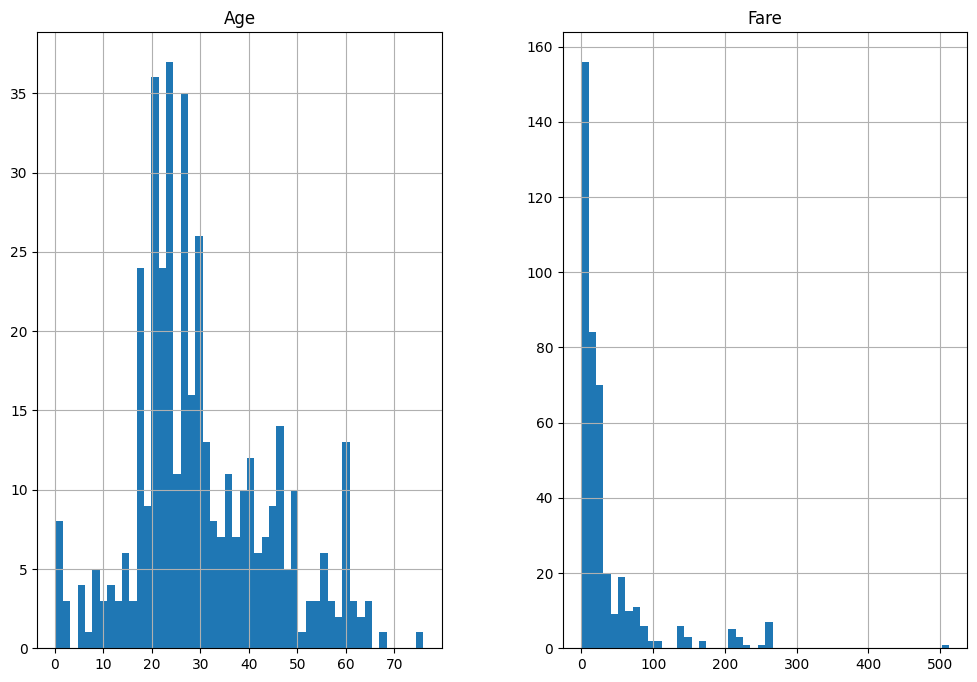

In [17]:
test_data[['Age', 'Fare']].hist(bins=50, figsize=(12, 8))
plt.show()

### 1. ***SEX***

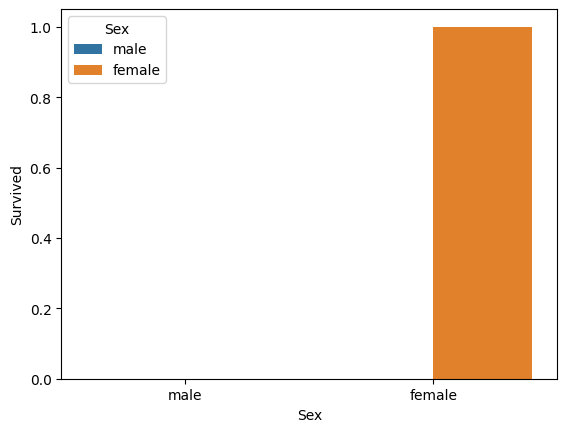

In [18]:
sns.barplot(data=test_data, x='Sex', y='Survived', hue='Sex')
plt.show()

OBSERVATION: Females have high chances of survival

---



### ***2. PCLASS***

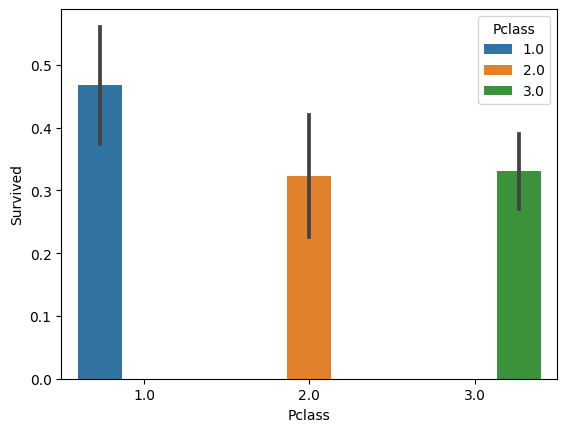

In [19]:
sns.barplot(data=test_data, x= 'Pclass', y='Survived', hue='Pclass')
plt.show()

OBSERVATION: Passenger class 1 have high chances of survival

---



### ***3. AGE***

a new class feature - AgeGroup which will assist in classification of age and give the general relationship with the Survival feature. Classification will be as follows:

0-5 -> Baby

6-15 -> Child

16-35 -> Youth

36-55 -> Adult

55-80 -> Senior

In [20]:
import numpy as np

bins = [0, 6, 16, 36, 55, np.inf]
labels = ['Baby', 'Child', 'Youth', 'Adult', 'Senior']

test_data['AgeGroup'] = pd.cut(test_data['Age'], bins = bins, labels = labels)

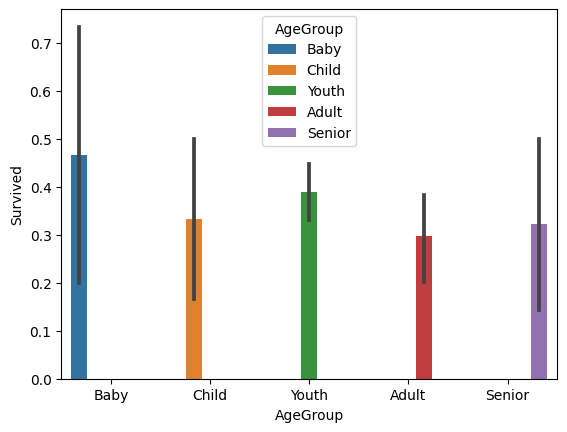

In [21]:
sns.barplot(data=test_data, x='AgeGroup', y='Survived', hue='AgeGroup')
plt.show()

OBSERVATION:

1. Babies have high chances of survival

2. Youths have second highest chances of survival

3. Children and senior have similar chances of survival

4. Adults have low chances of survival

---



### ***4. SIBSP***

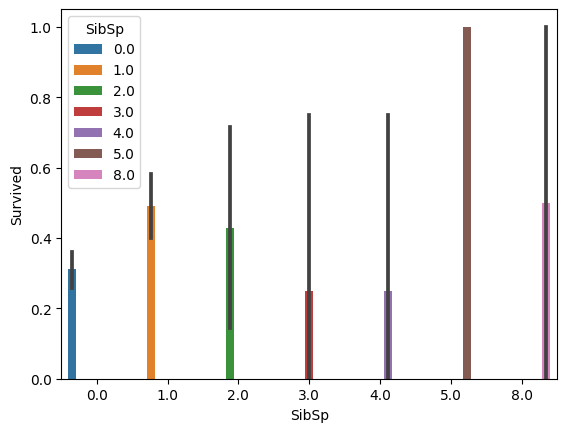

In [22]:
sns.barplot(data=test_data, x='SibSp', y='Survived', hue='SibSp')
plt.show()

OBSERVATION: High chances of survival of passengers with one or five extra persons

---



### ***5. PARCH***

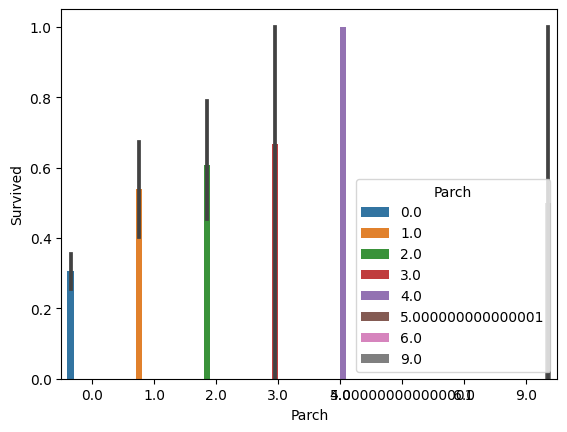

In [23]:
sns.barplot(data=test_data, x='Parch', y='Survived', hue='Parch')
plt.show()

OBSERVATION: High chances of survival of passengers who are in parent-child relations.

---



### ***6. TICKET***

In [24]:
891 - int(df_test['Ticket'].unique().shape[0])

528

OBSERVATION: Only 528 tickets are shared among the passengers giving the impression that less could be got from the Ticket feature.

---



### ***7. FARE***

In [25]:
test_data[['Fare', 'Pclass']][test_data['Fare'] == 0]

,Fare,Pclass
266,0.0,1.0
372,0.0,1.0


In [26]:
pclass_mean1 = round(test_data['Fare'][test_data['Pclass'] == 1].mean(), 4)
pclass_mean2 = round(test_data['Fare'][test_data['Pclass'] == 2].mean(), 4)
pclass_mean3 = round(test_data['Fare'][test_data['Pclass'] == 3].mean(), 4)
print(f'Mean 1: {pclass_mean1}, Mean 2: {pclass_mean2}, Mean : {pclass_mean3}')

Mean 1: 94.2803, Mean 2: 22.2021, Mean : 12.4387


In [27]:
test_data['Fare'][(test_data['Pclass'] == 1) & (test_data['Fare'] == 0)] = pclass_mean1
test_data['Fare'][(test_data['Pclass'] == 2) & (test_data['Fare'] == 0)] = pclass_mean2
test_data['Fare'][(test_data['Pclass'] == 3) & (test_data['Fare'] == 0)] = pclass_mean3

<ipython-input-27-83eb2a8de31c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Fare'][(test_data['Pclass'] == 1) & (test_data['Fare'] == 0)] = pclass_mean1
<ipython-input-27-83eb2a8de31c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Fare'][(test_data['Pclass'] == 2) & (test_data['Fare'] == 0)] = pclass_mean2
<ipython-input-27-83eb2a8de31c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Fare'][(t

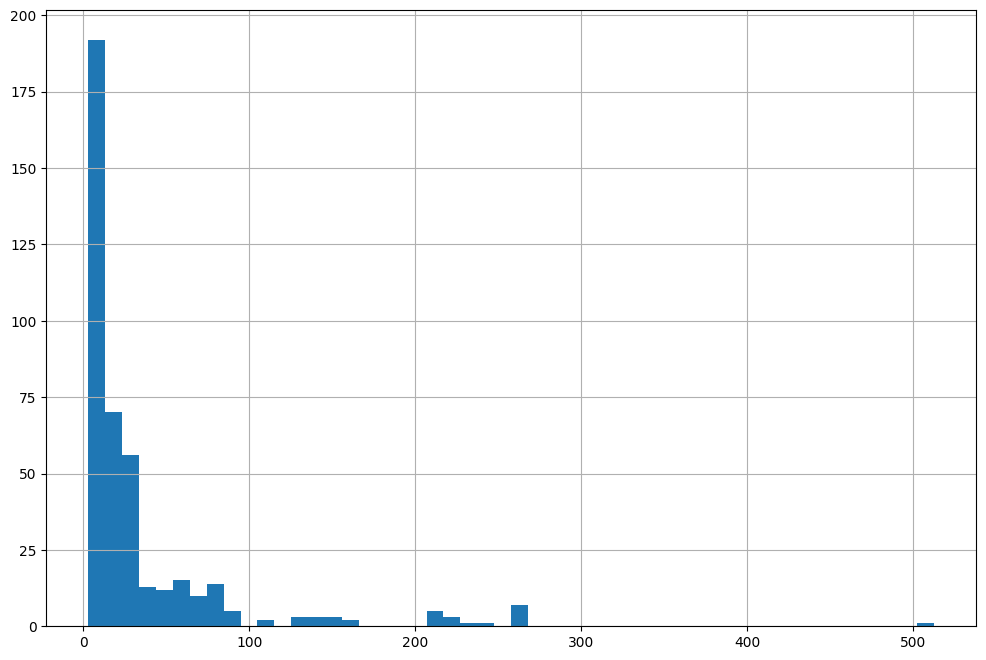

In [28]:
test_data['Fare'].hist(bins=50, figsize=(12, 8))
plt.show()

In [29]:
test_data['FareGroup'] = pd.cut(test_data['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4]).astype(int)
test_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name,AgeGroup,FareGroup
0,0.0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,male,Q,892,"Kelly, Mr. James",Youth,1
1,1.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,female,S,893,"Wilkes, Mrs. James (Ellen Needs)",Adult,1
2,0.0,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,male,Q,894,"Myles, Mr. Thomas Francis",Senior,1
3,0.0,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,male,S,895,"Wirz, Mr. Albert",Youth,1
4,1.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,female,S,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Youth,1


### ***8. EMBARKED***

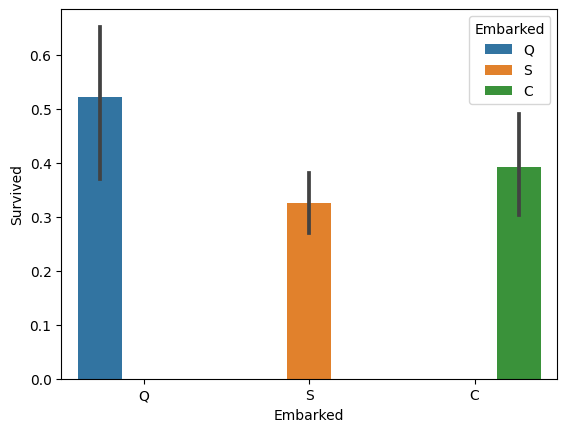

In [30]:
sns.barplot(data=test_data, x='Embarked', y='Survived', hue='Embarked')
plt.show()

OBSERVATION: Passengers who embarked at queenstown are more likely to survive with those of southampton

---



### ***9. NAME***

In [31]:
def titling(X, attrib):
    titles = []
    for i in range(len(X)):
        titles.append(str(df_test[attrib][i]).split('.')[0].split(',')[1].strip(' '))

    return titles

In [32]:
test_data['Title'] = titling(test_data, 'Name')
test_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

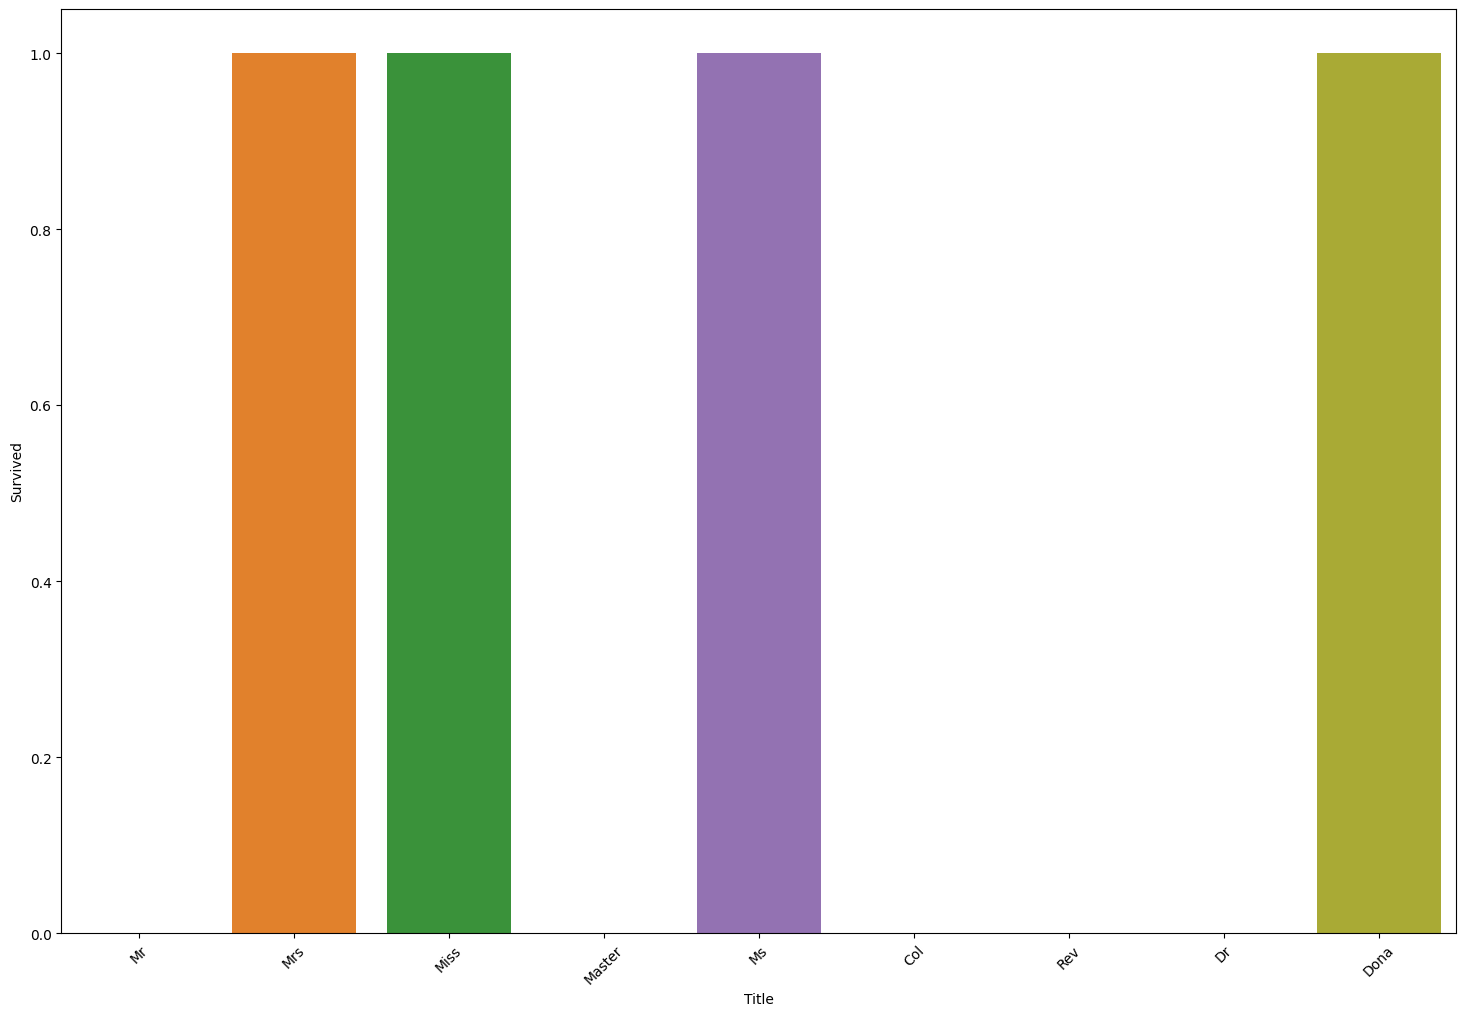

In [33]:
plt.figure(figsize=(18, 12))
g = sns.barplot(data=test_data, x='Title', y='Survived')
g.set_xticklabels(labels=test_data['Title'].unique(), rotation=45)
plt.show()

OBSERVATION:

1. [Master, col] - Royal(1)

2. [Mr, ms, miss, Dr, Mrs] - common (2)

3. [Rev, Dona] - Low(3)




In [34]:
def tilgrouping(X, attrib):
    royal = ['Master', 'Col']
    common = ['Mr', 'Mrs', 'Miss', 'Dr','Ms']
    low = ['Dona', 'Rev']

    titleg = []

    for i in range(len(X[attrib])):
        if (X[attrib][i]) in royal:
            titleg.append(1)
        elif (X[attrib][i]) in common:
            titleg.append(2)
        elif (X[attrib][i]) in low:
            titleg.append(0)

    return titleg

In [35]:
test_data['TitleGroup'] = tilgrouping(test_data, 'Title')
test_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name,AgeGroup,FareGroup,Title,TitleGroup
0,0.0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,male,Q,892,"Kelly, Mr. James",Youth,1,Mr,2
1,1.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,female,S,893,"Wilkes, Mrs. James (Ellen Needs)",Adult,1,Mrs,2
2,0.0,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,male,Q,894,"Myles, Mr. Thomas Francis",Senior,1,Mr,2
3,0.0,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,male,S,895,"Wirz, Mr. Albert",Youth,1,Mr,2
4,1.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,female,S,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Youth,1,Mrs,2


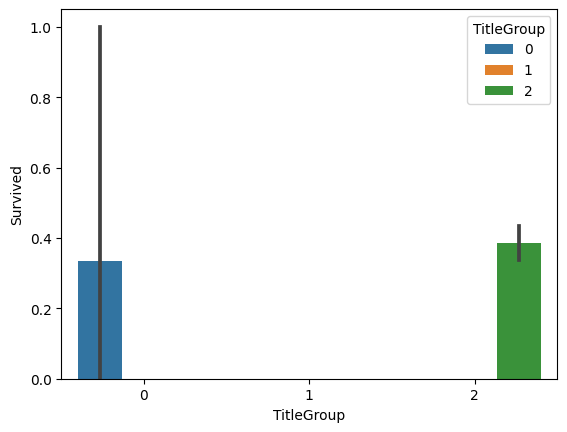

In [36]:
sns.barplot(data=test_data, x='TitleGroup', y='Survived', hue='TitleGroup')
plt.show()

OBSERVATION: Class 2 (common) have high chances of survival compared to class 0 and class 1

---



### ***10. FAMILY SIZE AND FAMILY TYPE***

In [37]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name,AgeGroup,FareGroup,Title,TitleGroup,FamilySize
0,0.0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,male,Q,892,"Kelly, Mr. James",Youth,1,Mr,2,0.0
1,1.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,female,S,893,"Wilkes, Mrs. James (Ellen Needs)",Adult,1,Mrs,2,1.0
2,0.0,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,male,Q,894,"Myles, Mr. Thomas Francis",Senior,1,Mr,2,0.0
3,0.0,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,male,S,895,"Wirz, Mr. Albert",Youth,1,Mr,2,0.0
4,1.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,female,S,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Youth,1,Mrs,2,2.0


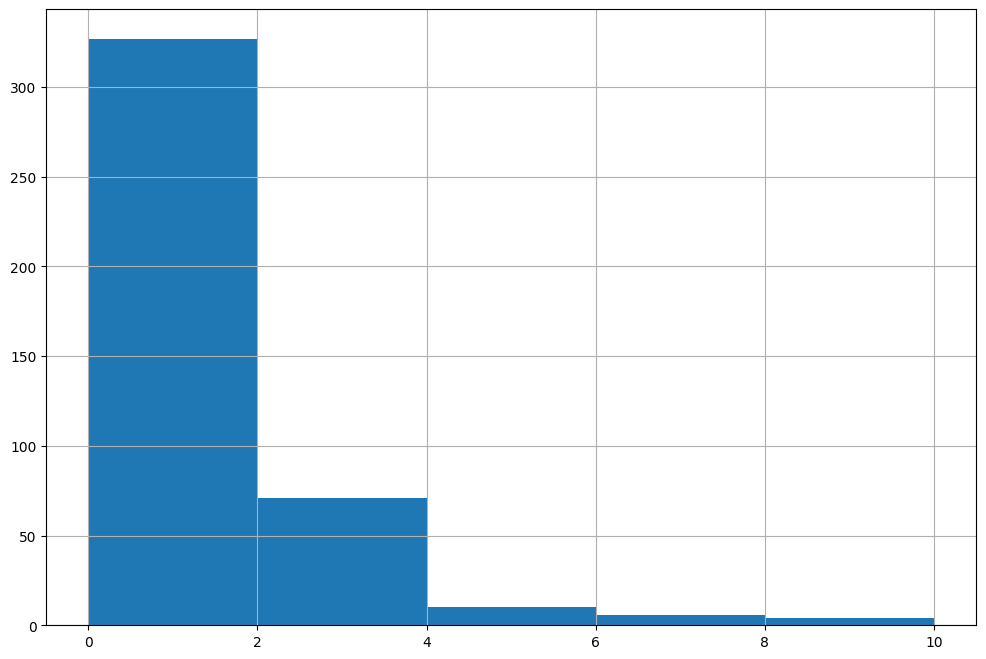

In [38]:
test_data['FamilySize'].hist(bins =5, figsize=(12, 8))
plt.show()

In [39]:
test_data['FamilyType'] = pd.cut(test_data['FamilySize'], bins=[-1, 0.5, 4, np.inf], labels=['Alone', 'Small', 'Big'])

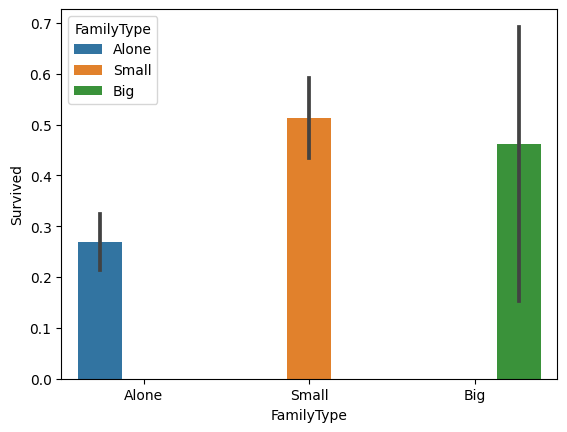

In [40]:
sns.barplot(data=test_data, x='FamilyType', y ='Survived', hue='FamilyType')
plt.show()

### ***CREATING CLEAN TEST DATA***

One-Hot Encoding

    Sex
    Embarked
    AgeGroup

Label Encoding

    FamilyType


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                                                                 'Fare', 'Embarked', 'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType']], test_data[['Survived']], test_size=0.3, random_state=42)

### ***ONE-HOT ENCODING***

In [42]:
dummies = pd.get_dummies(X_train[['Sex', 'Embarked', 'AgeGroup']], drop_first=True)
inputs = pd.concat([X_train.drop(['Sex', 'Embarked', 'AgeGroup'], axis=1), dummies], axis=1)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
le.fit(inputs['FamilyType'])
inputs['FamilyType'] = le.transform(inputs['FamilyType'])

### ***TESTING DIFFERENT MODELS***



    1. Random Forest

    2.  LightGBM

    3. SVC

    4. KNN

    5. AdaBoost

    6. CatBoost

From the 6 the best will then be selected to be used to predict survival of passengers in the test dataset

In [45]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

In [47]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean Score:', scores.mean())
    print('Std: ', scores.std())

### ***1. KNN***

In [48]:
knn_cls = KNeighborsClassifier()
scores_knn = cross_val_score(knn_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)

display_scores(scores_knn)

Scores:  [0.6        0.7        0.68965517 0.72413793 0.62068966 0.68965517
 0.55172414 0.51724138 0.62068966 0.62068966]
Mean Score: 0.633448275862069
Std:  0.06384527223810817


### ***2. SVC***

In [49]:
svc_cls = SVC()

scores_svc = cross_val_score(svc_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_svc)

Scores:  [0.66666667 0.6        0.68965517 0.65517241 0.55172414 0.62068966
 0.62068966 0.62068966 0.5862069  0.55172414]
Mean Score: 0.6163218390804598
Std:  0.04358671613262828


### ***3. RANDOM FOREST***

In [50]:
rf_cls = RandomForestClassifier()

scores_rf = cross_val_score(rf_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_rf)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Std:  0.0


### ***4. LightGBM***

In [51]:
lgb_cls = LGBMClassifier()

scores_lgb = cross_val_score(lgb_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_lgb)

[LightGBM] [Info] Number of positive: 100, number of negative: 162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381679 -> initscore=-0.482426
[LightGBM] [Info] Start training from score -0.482426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

### ***5. AdaBoost***

In [52]:
ada_cls = AdaBoostClassifier()

scores_ada = cross_val_score(ada_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_ada)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Std:  0.0


### ***6. CatBoost***

In [53]:
cat_features = ['Sex', 'Embarked', 'AgeGroup', 'FamilyType']
cat_cls = CatBoostClassifier(iterations=2500, learning_rate=0.05, random_seed=42, cat_features=cat_features, verbose=False)

scores_cat = cross_val_score(cat_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=10)

In [54]:
display_scores(scores_cat)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Std:  0.0


### ***HYPERPARAMETER TUNING***

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


rf_param_grid = {
    'n_estimators': [100, 250, 400,],
    'criterion': ['gini', 'entropy'],
    "min_samples_split":[2,3,10],
    "min_samples_leaf":[1,3,10],
    'max_features': ['sqrt', 'log2'],
    'random_state':[8, 16, 42],
}

lgb_param_grid = {
    'boosting_type ':['gbdt', 'rf', 'goss', 'dart'],
    'learning_rate': [0.025, 0.05, 0.1, 0.2],
    'n_estimators': [100, 250, 400],
    'metric': ['auc', 'average_precision'],
    'random_state':[8, 16, 42],
}

ada_param_grid = {
    'n_estimators': [50, 100, 250],
    'learning_rate': [0.1, 0.5, 1, 1.5],
    'random_state':[8, 16, 42],
}

cat_param_grid = {
    'iterations': [1000, 1600, 2000, 2400],
    'learning_rate': [0.01, 0.03, 0.05],
    'random_state':[8, 16, 42],
}

classifier_param = [rf_param_grid, lgb_param_grid, ada_param_grid]


classifier = [RandomForestClassifier(), LGBMClassifier(), AdaBoostClassifier()]

In [ ]:
cv_result = []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i],
                       scoring='accuracy', n_jobs=-1, cv=StratifiedKFold(n_splits=10))
    clf.fit(inputs, y_train.values.ravel())
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)

In [58]:
clf2 = GridSearchCV(CatBoostClassifier(cat_features=cat_features, verbose=False), param_grid=cat_param_grid,
                    scoring='accuracy', n_jobs=-1, cv=StratifiedKFold(n_splits=10))
clf2.fit(X_train, y_train.values.ravel())
cv_result.append(clf2.best_score_)
best_estimators.append(clf2.best_estimator_)

In [60]:
result = pd.DataFrame({'Mean Score': cv_result, 'Model': ['Random Forest', 'LightGBM', 'AdaBoost', 'CatBoost']})

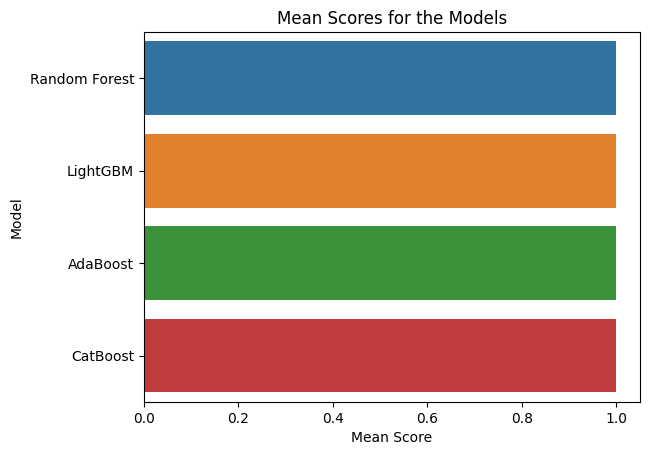

In [61]:
g = sns.barplot(data=result, x='Mean Score', y='Model')
g.set_xlabel('Mean Score')
g.set_title('Mean Scores for the Models')
plt.show()

In [62]:
rf_model = best_estimators[0]
lgb_model= best_estimators[1]
ada_model = best_estimators[2]
cat_model = best_estimators[3]

### ***VALIDATING THE MODELS***

In [63]:
dummies_ = pd.get_dummies(X_valid[['Sex', 'Embarked', 'AgeGroup']], drop_first=True)
inputs_valid = pd.concat([X_valid.drop(['Sex', 'Embarked', 'AgeGroup'], axis=1), dummies_], axis=1)

In [64]:
inputs_valid['FamilyType'] =le.transform(inputs_valid['FamilyType'])
inputs_valid.head()

,Pclass,Age,SibSp,Parch,Fare,FareGroup,TitleGroup,FamilySize,FamilyType,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Youth,AgeGroup_Adult,AgeGroup_Senior
321,3.0,25.0,0.0,0.0,7.2292,1,2,0.0,0,1,0,0,0,1,0,0
324,1.0,39.0,0.0,0.0,211.3375,4,2,0.0,0,0,0,1,0,0,1,0
388,3.0,21.0,0.0,0.0,7.7500,1,2,0.0,0,1,1,0,0,1,0,0
56,3.0,35.0,0.0,0.0,7.8958,1,2,0.0,0,1,0,1,0,1,0,0
153,3.0,36.0,0.0,2.0,12.1833,1,2,2.0,2,0,0,1,0,1,0,0


In [65]:
rf_preds = rf_model.predict(inputs_valid)
lgb_preds = lgb_model.predict(inputs_valid)
ada_preds = ada_model.predict(inputs_valid)
cat_preds = cat_model.predict(X_valid)

rf_acc = accuracy_score(y_valid.values.ravel(), rf_preds)
lgb_acc = accuracy_score(y_valid.values.ravel(), lgb_preds)
ada_acc = accuracy_score(y_valid.values.ravel(), ada_preds)
cat_acc = accuracy_score(y_valid.values.ravel(), cat_preds)

print(f'Accuracies -> Random Forest: {rf_acc}, LightGBM: {lgb_acc}, AdaBoost: {ada_acc}, CatBoost:{cat_acc}')

[LightGBM] [Warning] boosting_type is set=gbdt, boosting_type= will be ignored. Current value: boosting_type=gbdt
[LightGBM] [Warning] Unknown parameter: gbdt
Accuracies -> Random Forest: 1.0, LightGBM: 1.0, AdaBoost: 1.0, CatBoost:1.0


OBSERVATION: All the models have same test accuracies.

---



### ***PREDICT SURVIVAL OF PASSENGERS IN THE TEST DATA***

***PROCESSING TEST DATA***

In [66]:
X_train.shape

(292, 12)

In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### ***IMPUTING MISSING VALUES IN THE TEST DATA***

In [68]:
data1 = df_test[['Pclass', 'Sex','Age', 'SibSp','Parch', 'Fare', 'Embarked']]

In [69]:
data1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [70]:
# Sex and Embarked Encoding
seencoding = pd.get_dummies(data1[['Sex', 'Embarked']], drop_first=True)
data_tst = pd.concat([data1.drop(['Sex', 'Embarked'], axis=1), seencoding], axis=1)

In [71]:
data_tst.shape

(418, 8)

In [72]:
# Scaling
scaler1 = MinMaxScaler()
tst_fmd = scaler1.fit_transform(data_tst)
data_tst1 = pd.DataFrame(data=tst_fmd, columns=data_tst.columns)

In [73]:
data_tst1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,1.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.018909,1.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.016908,1.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0


In [74]:
# Imputing Missing Values
data_tst2 = knn_imputer.fit_transform(data_tst1)
data_tst3 = pd.DataFrame(data=data_tst2, columns=data_tst1.columns)
data_tst3.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,1.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.018909,1.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.016908,1.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0


In [75]:
data_tst_inv = scaler1.inverse_transform(data_tst3)
data_tst4 = pd.DataFrame(data=data_tst_inv, columns=data_tst3.columns)
data_tst4.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0
2,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0
3,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0
4,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0


In [76]:
# Recreate the Sex Feature

data_tst4['Sex'] = sexify(data_tst4['Sex_male'])

In [77]:
 #Recreate the Embarked Feature
data_tst4['Embarked'] = embify(data_tst4[['Embarked_Q', 'Embarked_S']])

In [78]:
test_data = pd.concat([data_tst4[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']], df_test[['PassengerId','Name']]], axis=1)

In [79]:
test_data.columns, X_train.columns

(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
        'PassengerId', 'Name'],
       dtype='object'),
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
        'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType'],
       dtype='object'))

In [80]:
test_data[['Fare', 'Pclass']][test_data['Fare'] == 0]

,Fare,Pclass
266,0.0,1.0
372,0.0,1.0


In [81]:
pclass_mean1t = round(test_data['Fare'][test_data['Pclass'] == 1.0].mean(), 4)

In [82]:
test_data['Fare'][(test_data['Fare'] == 0) & (test_data['Pclass'] == 1)] =pclass_mean1t

<ipython-input-82-bf2ff37693be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Fare'][(test_data['Fare'] == 0) & (test_data['Pclass'] == 1)] =pclass_mean1t


In [83]:
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins = bins, labels = labels)

In [84]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId,Name,AgeGroup
0,3.0,male,34.5,0.0,0.0,7.8292,Q,892,"Kelly, Mr. James",Youth
1,3.0,female,47.0,1.0,0.0,7.0000,S,893,"Wilkes, Mrs. James (Ellen Needs)",Adult
2,2.0,male,62.0,0.0,0.0,9.6875,Q,894,"Myles, Mr. Thomas Francis",Senior
3,3.0,male,27.0,0.0,0.0,8.6625,S,895,"Wirz, Mr. Albert",Youth
4,3.0,female,22.0,1.0,1.0,12.2875,S,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Youth


In [85]:
test_data['FareGroup'] = pd.cut(test_data['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4]).astype(int)

In [86]:
test_data['Title'] = titling(test_data, 'Name')

In [87]:
test_data['TitleGroup'] = tilgrouping(test_data, 'Title')

In [88]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data['FamilyType'] = pd.cut(test_data['FamilySize'], bins=[-1, 0.5, 4, np.inf], labels=['Alone', 'Small', 'Big'])

In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    float64 
 1   Sex          418 non-null    object  
 2   Age          418 non-null    float64 
 3   SibSp        418 non-null    float64 
 4   Parch        418 non-null    float64 
 5   Fare         418 non-null    float64 
 6   Embarked     418 non-null    object  
 7   PassengerId  418 non-null    int64   
 8   Name         418 non-null    object  
 9   AgeGroup     418 non-null    category
 10  FareGroup    418 non-null    int64   
 11  Title        418 non-null    object  
 12  TitleGroup   418 non-null    int64   
 13  FamilySize   418 non-null    float64 
 14  FamilyType   418 non-null    category
dtypes: category(2), float64(6), int64(3), object(4)
memory usage: 43.7+ KB


In [92]:
test_data.to_csv('/content/drive/MyDrive/MLData/tested.csv',index=False)

In [93]:
test_preds = cat_model.predict(test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType']])

In [94]:
survival_results = pd.concat([df_test['PassengerId'], pd.Series(test_preds, name='Survived')], axis=1)

In [95]:
survival_results.to_csv('survived_submission.csv', index=False)

### ***SAVING THE MODEL***

In [96]:
import joblib
import os

In [100]:
path = '/content/drive/MyDrive/MLData'
filenames =  ['Titanic_CatBoost_model.joblib', 'Titanic_LightGBM_model.joblib', 'Titanic_RF_model.joblib','Titanic_Ada_model.joblib']
models = [cat_model, lgb_model, rf_model, ada_model]

for i in range(len(filenames)):
  joblib.dump(models[i], os.path.join(path, filenames[i]))